Reference: https://www.tensorflow.org/tutorials/load_data/images#create_a_dataset

In [1]:
import tensorflow as tf
import numpy as np

In [2]:
batchSize = 128 # 64
imgHeight = 128
imgWidth = 128

dataPath = "datasets/food-101/food-101/images/"

trainDataset = tf.keras.utils.image_dataset_from_directory(
  dataPath,
  validation_split=0.2,
  subset="training",
  color_mode = "grayscale", 
  shuffle = True,
  seed=123,
  image_size=(imgHeight, imgWidth),
  batch_size=batchSize)

valDataset = tf.keras.utils.image_dataset_from_directory(
  dataPath,
  validation_split=0.2,
  subset="validation",
  color_mode = "grayscale",
  shuffle = True,
  seed=123,
  image_size=(imgHeight, imgWidth),
  batch_size=batchSize)




Found 100999 files belonging to 101 classes.
Using 80800 files for training.
Found 100999 files belonging to 101 classes.
Using 20199 files for validation.


In [3]:
valBatch = tf.data.experimental.cardinality(valDataset)
testDataset = valDataset.take((2*valBatch) // 3)
valDataset = valDataset.skip((2*valBatch) // 3)

In [4]:
classNames = trainDataset.class_names
print(classNames)

['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheese_plate', 'cheesecake', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna', 'lobster_bisque', 'lobster_roll_sandwich', 'macaroni_and_cheese', 'macarons', 'miso_sou

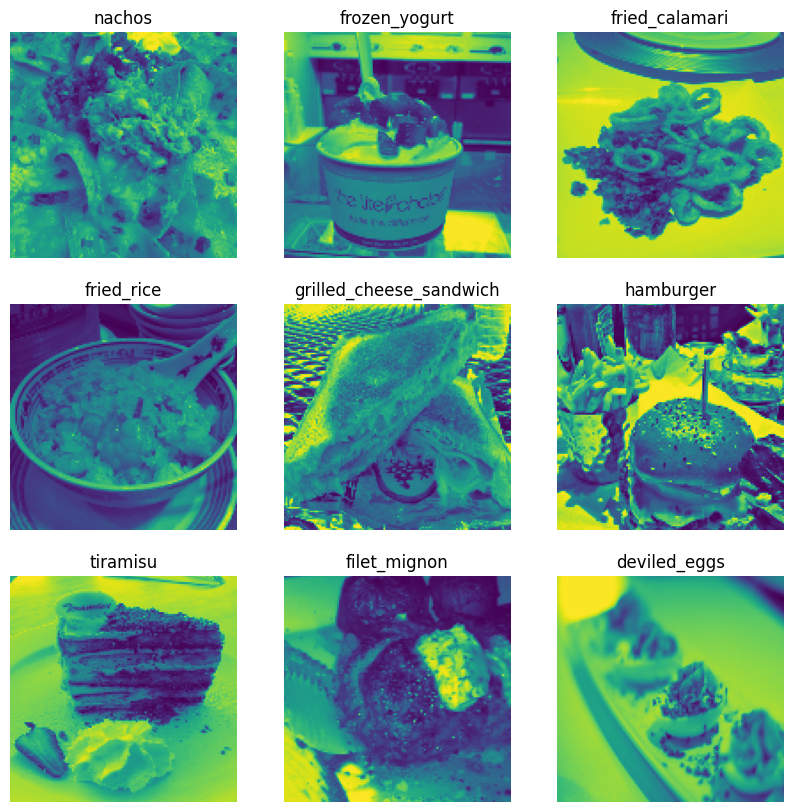

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in trainDataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(classNames[labels[i]])
    plt.axis("off")

In [6]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [7]:
AUTOTUNE = tf.data.AUTOTUNE

trainDataset = trainDataset.cache().prefetch(buffer_size=AUTOTUNE)
valDataset = valDataset.cache().prefetch(buffer_size=AUTOTUNE)

In [8]:
numClasses = 101

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(numClasses)
])

In [9]:
learningRate = 1e-3

model.compile(
  optimizer=tf.keras.optimizers.Adam(learningRate),
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [14]:
model.fit(
  trainDataset,
  validation_data=valDataset,
  epochs=4,
  verbose = 2
)

Epoch 1/4


632/632 - 45s - loss: 3.4526 - accuracy: 0.1900 - val_loss: 3.9485 - val_accuracy: 0.1229 - 45s/epoch - 71ms/step
Epoch 2/4
632/632 - 45s - loss: 3.2482 - accuracy: 0.2278 - val_loss: 4.0174 - val_accuracy: 0.1272 - 45s/epoch - 71ms/step
Epoch 3/4
632/632 - 44s - loss: 3.0592 - accuracy: 0.2650 - val_loss: 4.1395 - val_accuracy: 0.1201 - 44s/epoch - 70ms/step
Epoch 4/4
632/632 - 44s - loss: 2.8969 - accuracy: 0.2983 - val_loss: 4.2523 - val_accuracy: 0.1188 - 44s/epoch - 69ms/step


In [15]:
prediction = model.predict(testDataset.take(1))
print(prediction)
print(prediction.shape)
predictedClassIndices = np.argmax(prediction, axis = 1)
print(predictedClassIndices)
predictedClassLabel = np.array(classNames)[predictedClassIndices]

print(predictedClassLabel)

plt.figure(figsize=(10, 10))
for images, labels in testDataset.take(1):

    print(np.array(classNames)[np.array(labels)])

    # for i in range(9):
    #     ax = plt.subplot(3, 3, i + 1)
    #     plt.imshow(images[i].numpy().astype("uint8"))
    #     plt.title(classNames[labels[i]])
    #     plt.axis("off")





1/1 [==============================] - 0s 397ms/step
[[ 0.8165151  -2.5183432   0.6445671  ... -0.8878552   0.88706875
  -0.9657392 ]
 [-1.6815742  -4.113081   -1.9300071  ...  4.4260697   1.6639105
   1.3017651 ]
 [-2.169418    4.282458   -5.22314    ... -5.711919   -2.9931743
  -0.84138536]
 ...
 [-1.3706839  -0.55525476 -1.9862424  ...  0.87323684  0.09477565
  -1.6192876 ]
 [-0.6131721   0.52886397  1.5076714  ...  0.18888675 -1.6850718
  -5.2132998 ]
 [-2.1602116  -3.6130033  -1.324061   ... -2.5326135   1.7101479
   1.4569916 ]]
(128, 101)
[31 98  7 91 70 13 19 30 87 77 91 98 53 43 38 40 25 18 53 79 63 83  3 64
 71 66 80 91 72 19  3 65 70 60 63 46 39 82 11 91 86 13 75 41  1 69 18 18
  7 64 30 61 91 83 95 76 77 67  7  4 64 30 41 62 21 87 71 24 41 76 98 58
 63 46 68 76 14 27 71 53 91 15 24 44 29 70 71 95 63 12 52 98 92 77  4  1
 37 83 41  7 75 75 64 47 58  5 91 98 58 65 47 47 22 88 11 71 30 25  4 23
 96 97 46 81 91 88 21 33]
['donuts' 'tiramisu' 'bibimbap' 'spaghetti_carbonara' 'pa

<Figure size 1000x1000 with 0 Axes>